In [123]:
# utf-8
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# デｰタの読み込み

In [124]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv", header = None, delim_whitespace=True, decimal=',')

# trainデータとtestデータを結合

In [125]:
# フラグを立てる
train["flg"] = 1
test["flg"] = 0
# trainデータとtestデータを結合
all_data = pd.concat([train,test], axis = 0, sort = False)

# データの型の確認

In [126]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 39
Data columns (total 13 columns):
datetime         247 non-null object
y                207 non-null float64
week             247 non-null object
soldout          247 non-null int64
name             247 non-null object
kcal             202 non-null float64
remarks          28 non-null object
event            17 non-null object
payday           12 non-null float64
weather          247 non-null object
precipitation    247 non-null object
temperature      247 non-null float64
flg              247 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 27.0+ KB


In [127]:
# 各カラムの統計量を見る

In [128]:
all_data.describe()

,y,soldout,kcal,payday,temperature,flg
count,207.000000,247.000000,202.000000,12.0,247.000000,247.000000
mean,86.623188,0.445344,407.381188,1.0,19.157085,0.838057
std,32.882448,0.498013,28.396942,0.0,8.075680,0.369147
min,29.000000,0.000000,315.000000,1.0,1.200000,0.000000
25%,57.000000,0.000000,395.000000,1.0,13.650000,1.000000
50%,78.000000,0.000000,412.000000,1.0,19.400000,1.000000
75%,113.000000,1.000000,427.000000,1.0,25.450000,1.000000
max,171.000000,1.000000,462.000000,1.0,34.600000,1.000000


# 各列に欠損値が幾つあるか

In [129]:
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
flg                0
dtype: int64

In [130]:
test.isnull().sum()

datetime          0
week              0
soldout           0
name              0
kcal              4
remarks          33
event            37
payday           38
weather           0
precipitation     0
temperature       0
flg               0
dtype: int64

# 欠損値の処理

In [131]:
# kcal

In [132]:
all_data["kcal"].describe()

count    202.000000
mean     407.381188
std       28.396942
min      315.000000
25%      395.000000
50%      412.000000
75%      427.000000
max      462.000000
Name: kcal, dtype: float64

In [133]:
all_data["kcal"] = all_data["kcal"].fillna(train["kcal"].mean()) # 大きくはずれた値がないので平均値で埋める
all_data["kcal"].head()

0    404.409639
1    404.409639
2    404.409639
3    404.409639
4    404.409639
Name: kcal, dtype: float64

In [134]:
# 給料日 #給料日は1日なので、nanは0で埋める

In [135]:
all_data["payday"] = all_data["payday"].fillna(0)
all_data["payday"].unique()

array([0., 1.])

In [136]:
# event

In [137]:
all_data["event"] = all_data["event"].fillna("なし")
all_data["event"].unique()

array(['なし', 'ママの会', 'キャリアアップ支援セミナー'], dtype=object)

In [138]:
# remark #お楽しみメニューでないときは"なし"で埋める

In [139]:
all_data["remarks"] = all_data["remarks"].fillna("なし")
all_data["remarks"].unique()

array(['なし', '鶏のレモンペッパー焼（50食）、カレー（42食）', '酢豚（28食）、カレー（85食）', 'お楽しみメニュー',
       '料理長のこだわりメニュー', '手作りの味', 'スペシャルメニュー（800円）', '近隣に飲食店複合ビルオープン'],
      dtype=object)

In [140]:
# 欠損が埋まったか確認

In [141]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 39
Data columns (total 13 columns):
datetime         247 non-null object
y                207 non-null float64
week             247 non-null object
soldout          247 non-null int64
name             247 non-null object
kcal             247 non-null float64
remarks          247 non-null object
event            247 non-null object
payday           247 non-null float64
weather          247 non-null object
precipitation    247 non-null object
temperature      247 non-null float64
flg              247 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 27.0+ KB


Text(0,0.5,'temperature')

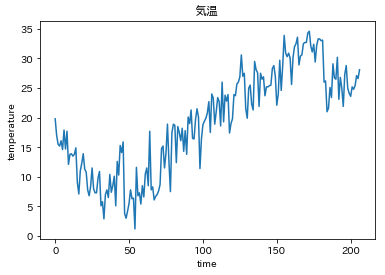

In [142]:
ax = train["temperature"].plot(title = "気温")
ax.set_xlabel("time")
ax.set_ylabel("temperature")

In [143]:
# 気温差が激しいので売り上げに影響があるのではないか？

# trainのweekの各値がいくつあるか？

In [144]:
train["week"].value_counts()

木    43
水    43
火    41
金    41
月    39
Name: week, dtype: int64

# trainのweekにダミ－変数を代入

In [145]:
pd.get_dummies(train["week"]).head()

,月,木,水,火,金
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,0,1


# trainのweatrherにダミ－変数を代入

In [146]:
pd.get_dummies(train["weather"]).head()

,快晴,晴れ,曇,薄曇,雨,雪,雷電
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [147]:
pd.get_dummies(train["weather"]).tail()

,快晴,晴れ,曇,薄曇,雨,雪,雷電
202,0,0,1,0,0,0,0
203,0,0,1,0,0,0,0
204,0,1,0,0,0,0,0
205,1,0,0,0,0,0,0
206,1,0,0,0,0,0,0


# trainからweekとteperatureとweatherを抜き出し、ダミ－変数化したものを変数trainXに代入

In [148]:
trainX = pd.get_dummies(train[["week", "temperature", "weather"]])

# trainXの中身の確認

In [149]:
trainX.head()

,temperature,week_月,week_木,week_水,week_火,week_金,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電
0,19.8,1,0,0,0,0,1,0,0,0,0,0,0
1,17.0,0,0,0,1,0,1,0,0,0,0,0,0
2,15.5,0,0,1,0,0,1,0,0,0,0,0,0
3,15.2,0,1,0,0,0,1,0,0,0,0,0,0
4,16.1,0,0,0,0,1,1,0,0,0,0,0,0


# trainのdatetimeから年と月のデ－タを取り出し、trainの新たな列として追加

In [150]:
train["year"] = train["datetime"].apply(lambda x :x.split("-")[0])
train["month"] = train["datetime"].apply(lambda x :x.split("-")[1])

# testのdatetimeから年と月のデ－タを取り出し、testの新たな列として追加

In [151]:
test["year"] = test["datetime"].apply(lambda x :x.split("-")[0])
test["month"] = test["datetime"].apply(lambda x :x.split("-")[1])

# trainのデ－タの型を調べる

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 15 columns):
datetime         207 non-null object
y                207 non-null int64
week             207 non-null object
soldout          207 non-null int64
name             207 non-null object
kcal             166 non-null float64
remarks          21 non-null object
event            14 non-null object
payday           10 non-null float64
weather          207 non-null object
precipitation    207 non-null object
temperature      207 non-null float64
flg              207 non-null int64
year             207 non-null object
month            207 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 24.3+ KB


# train,testのデ－タの型を整数(int)に変換

In [153]:
train["year"] = train["year"].astype(np.int)
train["month"] = train["month"].astype(np.int)
test["year"] =test["year"].astype(np.int)
test["month"] = test["month"].astype(np.int)


In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 15 columns):
datetime         207 non-null object
y                207 non-null int64
week             207 non-null object
soldout          207 non-null int64
name             207 non-null object
kcal             166 non-null float64
remarks          21 non-null object
event            14 non-null object
payday           10 non-null float64
weather          207 non-null object
precipitation    207 non-null object
temperature      207 non-null float64
flg              207 non-null int64
year             207 non-null int64
month            207 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 24.3+ KB


# train,testからyearとmonthを取り出し、変数trainX,testXに代入

In [155]:
trainX = train[["year", "month"]]
testX = test[["year", "month"]]

# trainXの中身の確認

In [156]:
trainX.head()

,year,month
0,2013,11
1,2013,11
2,2013,11
3,2013,11
4,2013,11


# trainからyを取り出し、変数yに代入

In [157]:
y = train["y"]

In [158]:
from sklearn.linear_model import LinearRegression as LR

In [159]:
model1 = LR()

In [160]:
model1.fit(trainX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
model1.coef_

array([-104.0107109 ,   -7.41004428])

# 追加する特徴量検討の為に、trainXに対する予測値を変数predに代入

In [162]:
pred = model1.predict(trainX)

# predをtrainの新たな列predとして代入

In [163]:
train["pred"] =pred

# trainのyとpredを引き算した結果をtrainの新たな列resとして代入

In [164]:
train["res"] = train["y"] - train["pred"]

In [165]:
train.sort_values(by = "res").head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,flg,year,month,pred,res
27,2013-12-26,80,木,0,酢豚,NaN,NaN,NaN,NaN,曇,--,7.3,1,2013,12,131.674984,-51.674984
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,1,2013,11,139.085028,-49.085028
81,2014-3-26,51,水,0,肉団子クリームシチュー,392.0,NaN,NaN,NaN,曇,--,18.7,1,2014,3,94.354672,-43.354672
82,2014-3-27,55,木,1,ロース甘味噌焼き,315.0,NaN,NaN,NaN,曇,1.5,12.4,1,2014,3,94.354672,-39.354672
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,1,2013,11,139.085028,-38.085028


In [166]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,flg,year,month,pred,res
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,1,2013,11,139.085028,-49.085028
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,1,2013,11,139.085028,-38.085028
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,1,2013,11,139.085028,-21.085028
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,1,2013,11,139.085028,-19.085028
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,1,2013,11,139.085028,-9.085028


# 値が「お楽しみメニュー」であれば１、そうでなければ０とする自作関数を作る

In [167]:
def jisaku(x):
    if x == "お楽しみメニュー":
        return 1
    else:
        return 0    

# jisaku1関数とapply関数を使って、trainとtestの新たな列funを作る

In [168]:
train["fun"] = train["remarks"].apply(lambda x : jisaku(x))
test["fun"] = test["remarks"].apply(lambda x : jisaku(x))

In [169]:
train[train["remarks"]=="お楽しみメニュー"].head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,flg,year,month,pred,res,fun
83,2014-3-28,106,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,NaN,快晴,--,18.5,1,2014,3,94.354672,11.645328,1
93,2014-4-11,128,金,1,チキンカレー,NaN,お楽しみメニュー,NaN,NaN,快晴,--,16.5,1,2014,4,86.944628,41.055372,1
103,2014-4-25,80,金,0,中華丼,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,20.8,1,2014,4,86.944628,-6.944628,1
115,2014-5-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,NaN,快晴,--,23.8,1,2014,5,79.534583,46.465417,1
125,2014-5-30,119,金,0,チキンカレー,NaN,お楽しみメニュー,NaN,NaN,薄曇,--,26.9,1,2014,5,79.534583,39.465417,1


In [170]:
train["curry"] = train["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)

In [172]:
from sklearn.linear_model import LinearRegression as LR

# 回答

## train,testからyearとmonth、funとtemperatureの4カラムを取り出し、変数trainX,testXに代入

In [69]:
trainX = train[["year", "month", "fun", "temperature"]]
testX = test[["year", "month", "fun", "temperature"]]

In [70]:
model2 = LR() # ロジスティック回帰を定義

In [71]:
model2.fit(trainX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
model2.coef_ #傾き

array([-76.3765687 ,  -4.20489757,  44.63348171,  -1.25463854])

In [73]:
model2.intercept_ #切片

153945.2541175833

In [74]:
pred2 = model2.predict(testX)

In [75]:
sample[1] = pred2

In [76]:
sample.to_csv("submit5.csv", index = None, header = None)

# 回答２

In [77]:
# train,testからyearとmonthとtemperatureの３カラムを取り出し、変数trainX,testXに代入

In [78]:
trainX = train[["year", "month",  "temperature"]]
testX = test[["year", "month", "temperature"]]

In [79]:
model3 = LR()

In [80]:
model3.fit(trainX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
model3.coef_ #傾き

array([-83.20224329,  -5.14775581,  -0.77874006])

In [82]:
model3.intercept_ #切片

167690.2673254738

In [83]:
pred2 = model3.predict(testX)

In [84]:
sample[1] = pred2

In [121]:
sample.to_csv("submit9.csv", index = None, header = None)

# 回答３

In [86]:
# trainのweekから月曜日を選ぶ

In [87]:
def monday(x):
    if x == "月":
        return 1
    else:
        return 0    

In [88]:
train["月"] = train["remarks"].apply(lambda x : monday(x))
test["月"] = test["remarks"].apply(lambda x : monday(x))

In [90]:
trainX = train[["year", "month",  "temperature", "月"]]
testX = test[["year", "month", "temperature", "月"]]

In [91]:
model4 = LR()

In [92]:
model4.fit(trainX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
model4.coef_ #傾き

array([-83.20224329,  -5.14775581,  -0.77874006,   0.        ])

In [94]:
model4.intercept_ #切片

167690.26732547366

In [95]:
pred2 = model4.predict(testX)

In [96]:
sample[1] = pred2

In [97]:
sample.to_csv("submit7.csv", index = None, header = None)

# 回答４

In [98]:
def kumori(x):
    if x == "曇":
        return 1
    else:
        return 0  

In [99]:
train["曇"] = train["remarks"].apply(lambda x : kumori(x))
test["曇"] = test["remarks"].apply(lambda x : kumori(x))

In [100]:
trainX = train[["year", "month",  "temperature", "曇"]]
testX = test[["year", "month", "temperature", "曇"]]

In [101]:
model5 = LR()

In [102]:
model5.fit(trainX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
model5.coef_ #傾き

array([-83.20224329,  -5.14775581,  -0.77874006,   0.        ])

In [104]:
model5.intercept_ #切片

167690.26732547366

# 回答５

In [105]:
def monday(x):
    if x == "月":
        return 1
    else:
        return 0

In [106]:
train["月"] = train["week"].apply(lambda x : monday(x))
test["月"] = test["week"].apply(lambda x : monday(x))

In [120]:
train.tail(10)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,...,temperature,flg,year,month,pred,res,fun,curry,月,曇
197,2014-9-16,56,火,0,チーズメンチカツ,438.0,NaN,NaN,NaN,晴れ,...,28.8,1,2014,9,49.894406,6.105594,0,0,0,0
198,2014-9-17,49,水,0,チキンフリカッセ,430.0,料理長のこだわりメニュー,ママの会,NaN,曇,...,25.0,1,2014,9,49.894406,-0.894406,0,0,0,0
199,2014-9-18,46,木,0,カレイ唐揚げ 甘酢あん,395.0,NaN,NaN,NaN,曇,...,24.1,1,2014,9,49.894406,-3.894406,0,0,0,0
200,2014-9-19,45,金,0,厚切イカフライ,400.0,NaN,NaN,NaN,薄曇,...,23.6,1,2014,9,49.894406,-4.894406,0,0,0,0
201,2014-9-22,29,月,0,筑前煮,395.0,NaN,NaN,NaN,晴れ,...,25.2,1,2014,9,49.894406,-20.894406,0,0,1,0
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,...,24.8,1,2014,9,49.894406,9.105594,0,0,0,0
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,...,25.4,1,2014,9,49.894406,0.105594,0,0,0,0
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,...,27.1,1,2014,9,49.894406,-4.894406,0,0,0,0
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,...,26.6,1,2014,9,49.894406,6.105594,0,0,1,0
206,2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,...,28.1,1,2014,9,49.894406,-9.894406,0,0,0,0


In [108]:
trainX = train[["year", "month",  "temperature", "月"]]
testX = test[["year", "month", "temperature", "月"]]

In [109]:
model6 = LR()

In [110]:
model6.fit(trainX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
model6.coef_ #傾き

array([-83.18303971,  -5.14060556,  -0.79078836,  10.47478481])

In [112]:
model6.intercept_ #切片

167649.8098594403

In [113]:
pred2 = model6.predict(testX)

In [114]:
sample[1] = pred2

In [115]:
sample.to_csv("submit9.csv", index = None, header = None)

In [104]:
trainX = train[["year", "month","temperature", "curry"]]
testX = test[["year", "month", "temperature", "curry"]]

KeyError: "['curry'] not in index"

In [105]:
trainX = train[["year", "month",  "temperature", "week"]]
testX = test[["year", "month", "temperature", "week"]]

In [106]:
model6 = LR()

In [107]:
model6.fit(trainX, y)

ValueError: could not convert string to float: '火'

In [108]:
model6.coef_ #傾き

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [109]:
model6.intercept_ #切片

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [110]:
pred2 = model6.predict(testX)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [111]:
sample[1] = pred2

In [ ]:
sample.to_csv("submit8.csv", index = None, header = None)